# Web Scraping Amazon Best Selling Books

## Getting data off the web
* Get raw data files (e.g. json, csv) over HTTP
* Get data through a dedicated web API
* Scrape the data by getting web pages via HTTP then parse them locally (topic of this notebook)

## Web scraping tools
* Basic knowledge of html and css (Essential)
* Browser developer tools (Essential)
* [Requests](http://docs.python-requests.org/en/master/) (Essential)
* [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/) (Essential)
* [Selenium with Python](http://selenium-python.readthedocs.io/) (Intermediate)
* [Scrapy](https://scrapy.org/) (Advanced)

## Scraping Amazon best selling books list

In [ ]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Scraping data
An example URL: `https://www.amazon.com/gp/bestsellers/2017/books#5`  
`https://` -- protocol  
`www.amazon.com` -- host  
`/gp/bestsellers/2017/books` -- path  
`#5` -- anchor  

**The part after the #, also known as the fragment identifier, is NEVER sent to the server with the request.**  

For more about URL, check out [this MDN page](https://developer.mozilla.org/en-US/docs/Learn/Common_questions/What_is_a_URL)

In [170]:
browser = webdriver.Chrome()

In [80]:
base_url = 'https://www.amazon.com/gp/bestsellers/'
years = range(1995, 2018)
urls = list(map(lambda x: base_url + str(x) + '/books', years))
urls

['https://www.amazon.com/gp/bestsellers/1995/books',
 'https://www.amazon.com/gp/bestsellers/1996/books',
 'https://www.amazon.com/gp/bestsellers/1997/books',
 'https://www.amazon.com/gp/bestsellers/1998/books',
 'https://www.amazon.com/gp/bestsellers/1999/books',
 'https://www.amazon.com/gp/bestsellers/2000/books',
 'https://www.amazon.com/gp/bestsellers/2001/books',
 'https://www.amazon.com/gp/bestsellers/2002/books',
 'https://www.amazon.com/gp/bestsellers/2003/books',
 'https://www.amazon.com/gp/bestsellers/2004/books',
 'https://www.amazon.com/gp/bestsellers/2005/books',
 'https://www.amazon.com/gp/bestsellers/2006/books',
 'https://www.amazon.com/gp/bestsellers/2007/books',
 'https://www.amazon.com/gp/bestsellers/2008/books',
 'https://www.amazon.com/gp/bestsellers/2009/books',
 'https://www.amazon.com/gp/bestsellers/2010/books',
 'https://www.amazon.com/gp/bestsellers/2011/books',
 'https://www.amazon.com/gp/bestsellers/2012/books',
 'https://www.amazon.com/gp/bestsellers/2013/b

In [144]:
base_a = 'zg_page'
page_nums = range(1, 6)
page_navs = list(map(lambda x: base_a + str(x), page_nums))
page_navs

['zg_page1', 'zg_page2', 'zg_page3', 'zg_page4', 'zg_page5']

In [191]:
def get_soup(browser, url, page_nav):
    if page_nav == 'zg_page1':
        browser.get(url)
    else:
        browser.find_element_by_id(page_nav).click() # Selenium clicks page navigation to modify fragment identifier
    time.sleep(4)
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    return soup
    
def get_books(soup, year):
    books = [];
    book_containers = soup.find_all('div', class_='zg_itemImmersion')
    for container in book_containers:
        # year
        year = current_year 
        
        # rank
        rank_span = container.find('span', class_='zg_rankNumber')
        rank = rank_span.string.strip()[:-1] 
        
        # asin
        asin_div = container.find('div', class_='a-section a-spacing-none p13n-asin')
        if asin_div:
            asin = asin_div['data-p13n-asin-metadata'][-12:-2]
        else:
            print('empty record')
            continue
        
        # title
        title_div = container.find('div', class_='p13n-sc-truncated-hyphen p13n-sc-truncated')
        if title_div.has_attr('title'):
            title = title_div['title']
        else:
            title = title_div.string

        # author
        author_div = title_div.parent.next_sibling.next_sibling
        author = author_div.string

        print("finished " + str(year) + "-" + str(rank))
        books.append({
            'asin': asin,
            'year': year,
            'rank': rank,
            'title': title,
            'author': author,
        })
        
    return books

In [192]:
book_list = [];
for current_year, url in zip(years, urls):
    for page_nav in page_navs:
        soup = get_soup(browser, url, page_nav)
        book_list.extend(get_books(soup, current_year))

finished 1995-1
finished 1995-2
finished 1995-3
finished 1995-4
finished 1995-5
finished 1995-6
finished 1995-7
finished 1995-8
finished 1995-9
finished 1995-10
finished 1995-11
finished 1995-12
finished 1995-13
finished 1995-14
finished 1995-15
finished 1995-16
finished 1995-17
finished 1995-18
finished 1995-19
finished 1995-20
finished 1995-21
finished 1995-22
finished 1995-23
finished 1995-24
finished 1995-25
finished 1995-26
finished 1995-27
finished 1995-28
finished 1995-29
finished 1995-30
finished 1995-31
finished 1995-32
finished 1995-33
finished 1995-34
finished 1995-35
finished 1995-36
finished 1995-37
finished 1995-38
finished 1995-39
finished 1995-40
finished 1995-41
finished 1995-42
finished 1995-43
finished 1995-44
finished 1995-45
finished 1995-46
finished 1995-47
finished 1995-48
finished 1995-49
finished 1995-50
finished 1995-51
finished 1995-52
finished 1995-53
finished 1995-54
finished 1995-55
finished 1995-56
finished 1995-57
finished 1995-58
finished 1995-59
finish

finished 2000-1
finished 2000-2
finished 2000-3
finished 2000-4
finished 2000-5
finished 2000-6
finished 2000-7
finished 2000-8
finished 2000-9
finished 2000-10
finished 2000-11
finished 2000-12
finished 2000-13
finished 2000-14
finished 2000-15
finished 2000-16
finished 2000-17
finished 2000-18
finished 2000-19
finished 2000-20
finished 2000-21
finished 2000-22
finished 2000-23
finished 2000-24
finished 2000-25
finished 2000-26
finished 2000-27
finished 2000-28
finished 2000-29
finished 2000-30
finished 2000-31
finished 2000-32
finished 2000-33
finished 2000-34
finished 2000-35
finished 2000-36
finished 2000-37
finished 2000-38
finished 2000-39
finished 2000-40
finished 2000-41
finished 2000-42
finished 2000-43
finished 2000-44
finished 2000-45
finished 2000-46
finished 2000-47
finished 2000-48
finished 2000-49
finished 2000-50
finished 2000-51
finished 2000-52
finished 2000-53
finished 2000-54
finished 2000-55
finished 2000-56
finished 2000-57
finished 2000-58
finished 2000-59
finish

finished 2005-1
finished 2005-2
finished 2005-3
finished 2005-4
finished 2005-5
finished 2005-6
finished 2005-7
finished 2005-8
finished 2005-9
finished 2005-10
finished 2005-11
finished 2005-12
finished 2005-13
finished 2005-14
finished 2005-15
finished 2005-16
finished 2005-17
finished 2005-18
finished 2005-19
finished 2005-20
finished 2005-21
finished 2005-22
finished 2005-23
finished 2005-24
finished 2005-25
finished 2005-26
finished 2005-27
finished 2005-28
finished 2005-29
finished 2005-30
finished 2005-31
finished 2005-32
finished 2005-33
finished 2005-34
finished 2005-35
finished 2005-36
finished 2005-37
finished 2005-38
finished 2005-39
finished 2005-40
finished 2005-41
finished 2005-42
finished 2005-43
finished 2005-44
finished 2005-45
finished 2005-46
finished 2005-47
finished 2005-48
finished 2005-49
finished 2005-50
finished 2005-51
finished 2005-52
finished 2005-53
finished 2005-54
finished 2005-55
finished 2005-56
finished 2005-57
finished 2005-58
finished 2005-59
finish

finished 2010-1
finished 2010-2
finished 2010-3
finished 2010-4
finished 2010-5
finished 2010-6
finished 2010-7
finished 2010-8
finished 2010-9
finished 2010-10
finished 2010-11
finished 2010-12
finished 2010-13
finished 2010-14
finished 2010-15
finished 2010-16
finished 2010-17
finished 2010-18
finished 2010-19
finished 2010-20
finished 2010-21
finished 2010-22
finished 2010-23
finished 2010-24
finished 2010-25
finished 2010-26
finished 2010-27
finished 2010-28
finished 2010-29
finished 2010-30
finished 2010-31
finished 2010-32
finished 2010-33
finished 2010-34
finished 2010-35
finished 2010-36
finished 2010-37
finished 2010-38
finished 2010-39
finished 2010-40
finished 2010-41
finished 2010-42
finished 2010-43
finished 2010-44
finished 2010-45
finished 2010-46
finished 2010-47
finished 2010-48
finished 2010-49
finished 2010-50
finished 2010-51
finished 2010-52
finished 2010-53
finished 2010-54
finished 2010-55
finished 2010-56
finished 2010-57
finished 2010-58
finished 2010-59
finish

finished 2015-1
finished 2015-2
finished 2015-3
finished 2015-4
finished 2015-5
finished 2015-6
finished 2015-7
finished 2015-8
finished 2015-9
finished 2015-10
finished 2015-11
finished 2015-12
finished 2015-13
finished 2015-14
finished 2015-15
finished 2015-16
finished 2015-17
finished 2015-18
finished 2015-19
finished 2015-20
finished 2015-21
finished 2015-22
finished 2015-23
finished 2015-24
finished 2015-25
finished 2015-26
finished 2015-27
finished 2015-28
finished 2015-29
finished 2015-30
finished 2015-31
finished 2015-32
finished 2015-33
finished 2015-34
finished 2015-35
finished 2015-36
finished 2015-37
finished 2015-38
finished 2015-39
finished 2015-40
finished 2015-41
finished 2015-42
finished 2015-43
finished 2015-44
finished 2015-45
finished 2015-46
finished 2015-47
finished 2015-48
finished 2015-49
finished 2015-50
finished 2015-51
finished 2015-52
finished 2015-53
finished 2015-54
finished 2015-55
finished 2015-56
finished 2015-57
finished 2015-58
finished 2015-59
finish

In [202]:
len(book_list)

2295

In [204]:
with open('booksdata.json', 'w') as outfile:
    json.dump(book_list, outfile)

### Exploring data

In [216]:
df = pd.DataFrame(book_list)
df['rank'] = df['rank'].astype(int)

In [217]:
df.dtypes

asin      object
author    object
rank       int64
title     object
year       int64
dtype: object

In [219]:
unique_books = df.groupby('asin')

In [220]:
len(unique_books)

1530

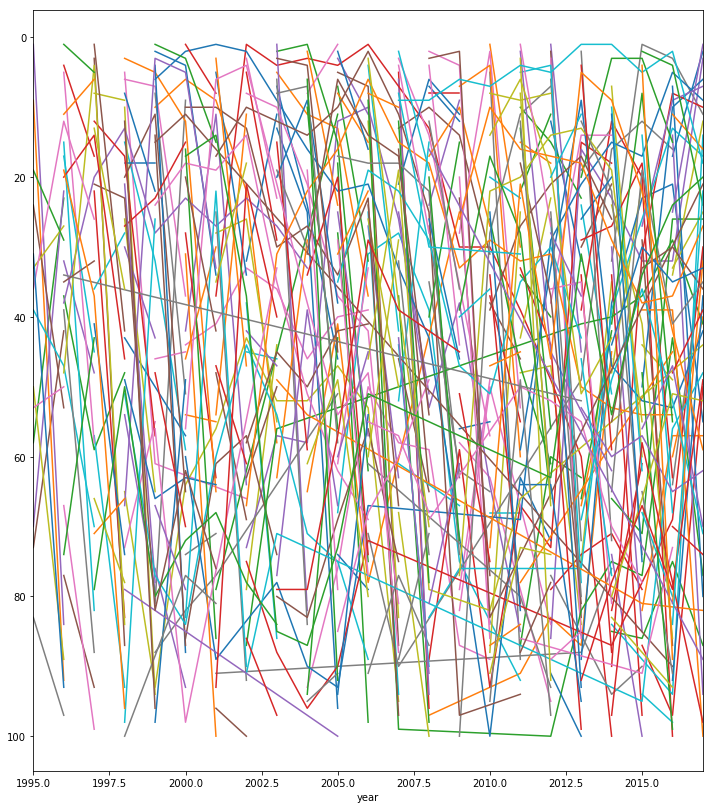

In [245]:
fig, ax = plt.subplots(1, 1, figsize=(12, 14))
for name, group in unique_books:
    if len(group) > 1:
        group.plot(ax=ax, x='year', y='rank', kind='line', legend=False)
plt.gca().invert_yaxis()

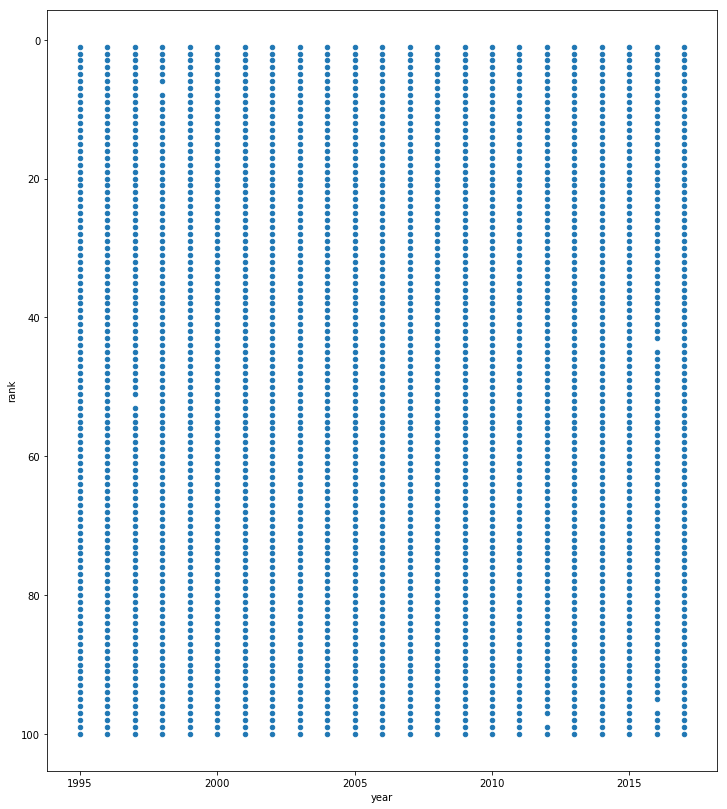

In [246]:
fig, ax = plt.subplots(1, 1, figsize=(12, 14))
for name, group in unique_books:
    group.plot(ax=ax, x='year', y='rank', kind='scatter')
plt.gca().invert_yaxis()

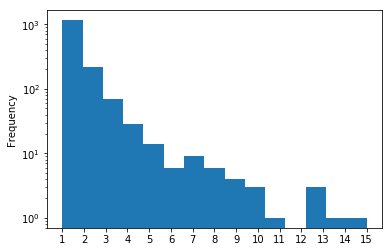

In [265]:
unique_books.size().plot(
    kind='hist', 
    bins=max(unique_books.size()), 
    logy=True,
    xticks=np.arange(1, max(unique_books.size())+1))

## Data visualization using d3.js

├── css  
│   └── style.css  
├── data  
│   └── booksdata.js  
├── index.html  
└── js  
    ├── d3.js  
    └── index.js  

Open index.html in your web browser